
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [2591]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2592]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, pearsonr


import nltk
from nltk.stem import WordNetLemmatizer
from collections import defaultdict


In [2593]:
data = pd.read_csv('/Users/dmitrykomarov/Desktop/Python/wb/wb_eda/shopping_trends_updated.csv')
df = data.copy()
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [2594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [2595]:
df.describe().applymap(lambda x: f"{x:2f}")[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].T

/var/folders/dk/n71lg2t15112j9nnvkz6cznm0000gn/T/ipykernel_7055/464007081.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe().applymap(lambda x: f"{x:2f}")[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].T


,count,mean,std,min,25%,50%,75%,max
Age,3900.000000,44.068462,15.207589,18.000000,31.000000,44.000000,57.000000,70.000000
Purchase Amount (USD),3900.000000,59.764359,23.685392,20.000000,39.000000,60.000000,81.000000,100.000000
Review Rating,3900.000000,3.749949,0.716223,2.500000,3.100000,3.700000,4.400000,5.000000
Previous Purchases,3900.000000,25.351538,14.447125,1.000000,13.000000,25.000000,38.000000,50.000000


In [2596]:
result = df.describe(include=["object", "category"])[['Gender', 'Item Purchased', 'Category', 
                                                      'Location', 'Size', 'Color', 'Season', 
                                                      'Subscription Status', 'Shipping Type', 
                                                      'Discount Applied', 'Promo Code Used', 
                                                      'Payment Method', 'Frequency of Purchases']].T
print(result)

                       count unique             top  freq
Gender                  3900      2            Male  2652
Item Purchased          3900     25          Blouse   171
Category                3900      4        Clothing  1737
Location                3900     50         Montana    96
Size                    3900      4               M  1755
Color                   3900     25           Olive   177
Season                  3900      4          Spring   999
Subscription Status     3900      2              No  2847
Shipping Type           3900      6   Free Shipping   675
Discount Applied        3900      2              No  2223
Promo Code Used         3900      2              No  2223
Payment Method          3900      6          PayPal   677
Frequency of Purchases  3900      7  Every 3 Months   584


In [2597]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [2598]:
# Гипотеза 1: Женщины старше 40 лет чаще покупают аксессуары.
df['Age_Group'] = df['Age'].apply(lambda x: '40+' if x > 40 else '≤40')
women_40_plus = df[(df['Gender'] == 'Female') & (df['Age_Group'] == '40+')]
accessories_count = women_40_plus['Category'].value_counts()
print("Распределение покупок среди женщин старше 40 лет:")
print(accessories_count)

Распределение покупок среди женщин старше 40 лет:
Category
Clothing       318
Accessories    219
Footwear       119
Outerwear       60
Name: count, dtype: int64


In [2599]:
from scipy.stats import ttest_ind

# Гипотеза 2: Люди, которые используют скидки, имеют более низкий средний рейтинг отзыва.
discount_yes = df[df['Discount Applied'] == 'Yes']['Review Rating']
discount_no = df[df['Discount Applied'] == 'No']['Review Rating']

t_stat, p_value = ttest_ind(discount_yes, discount_no, equal_var=False)


alpha = 0.05 

if p_value < alpha:
    print(f"t-статистика: {t_stat}, p-значение: {p_value}. Гипотеза отклоняется: существует статистически значимая разница.")
else:
    print(f"t-статистика: {t_stat}, p-значение: {p_value}. Гипотеза не отклоняется: разница статистически незначима.")

t-статистика: -0.7793383581645102, p-значение: 0.43583158342101125. Гипотеза не отклоняется: разница статистически незначима.


In [2600]:
from scipy.stats import chi2_contingency
import pandas as pd

# Гипотеза 3: Клиенты с подпиской чаще выбирают экспресс-доставку.
contingency_table = pd.crosstab(df['Subscription Status'], df['Shipping Type'] == 'Express')


chi2, p, _, _ = chi2_contingency(contingency_table)


alpha = 0.05 

if p < alpha:
    print(f"Хи-квадрат: {chi2}, p-значение: {p}. Гипотеза отклоняется: существует статистически значимая зависимость.")
else:
    print(f"Хи-квадрат: {chi2}, p-значение: {p}. Гипотеза не отклоняется: зависимость статистически незначима.")

Хи-квадрат: 2.1405757406557986, p-значение: 0.14344804665108468. Гипотеза не отклоняется: зависимость статистически незначима.


In [2601]:


# Гипотеза 4: Средняя сумма покупки выше у клиентов, которые используют электронные способы оплаты.
digital_methods = ['Venmo', 'PayPal', 'Credit Card']
digital_payments = df[df['Payment Method'].isin(digital_methods)]['Purchase Amount (USD)']
non_digital_payments = df[~df['Payment Method'].isin(digital_methods)]['Purchase Amount (USD)']


t_stat, p_value = ttest_ind(digital_payments, non_digital_payments, equal_var=False)


alpha = 0.05  

if p_value < alpha:
    print(f"Средняя сумма покупки - t-статистика: {t_stat}, p-значение: {p_value}. Гипотеза отклоняется: разница статистически значима.")
else:
    print(f"Средняя сумма покупки - t-статистика: {t_stat}, p-значение: {p_value}. Гипотеза не отклоняется: разница статистически незначима.")

Средняя сумма покупки - t-статистика: -0.8927397619417136, p-значение: 0.3720516691606116. Гипотеза не отклоняется: разница статистически незначима.


In [2602]:
# Гипотеза 5: Женщины ставят оценки выше, чем мужчины 
df.groupby('Gender')['Review Rating'].mean()

Gender
Female    3.741426
Male      3.753959
Name: Review Rating, dtype: float64

# Итог: мужчины и женщины ставят в среднем одинаковые оценки



In [2603]:
# Гипотеза 6: Популярный размер у мужчин и у женщин - М
popular_male_size = df[df['Gender'] == 'Male']['Size'].mode()[0]
popular_female_size = df[df['Gender'] == 'Female']['Size'].mode()[0]
print(f'Популярный размер у мужчин - {popular_male_size}')
print(f'Популярный размер у женщин - {popular_female_size}')


Популярный размер у мужчин - M
Популярный размер у женщин - M


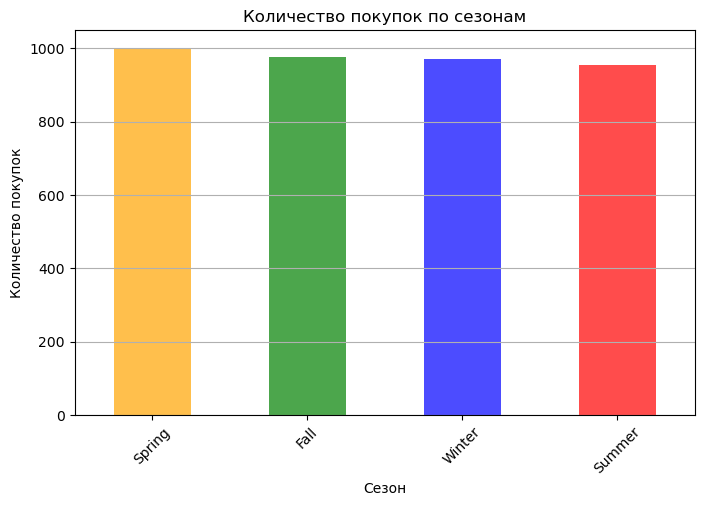

In [2604]:
# Гипотеза 7: Летом покупок больше, чем в остальные года

# Подсчет количества покупок для каждого сезона
purchases_by_season = df['Season'].value_counts()


plt.figure(figsize=(8, 5))
purchases_by_season.plot(kind='bar', color=['orange', 'green', 'blue', 'red'], alpha=0.7)
plt.title('Количество покупок по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Количество покупок')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [2605]:
max_order_season = purchases_by_season.idxmax()
print(f'Больше всего покупок - {max_order_season}')

Больше всего покупок - Spring


In [2606]:
# Гипотеза 8: Женщины старше 40 лет чаще покупают аксессуары.
df['Age_Group'] = df['Age'].apply(lambda x: '40+' if x > 40 else '≤40')
women_40_plus = df[(df['Gender'] == 'Female') & (df['Age_Group'] == '40+')]
accessories_count = women_40_plus['Category'].value_counts()
print("Распределение покупок среди женщин старше 40 лет:")
print(accessories_count)

Распределение покупок среди женщин старше 40 лет:
Category
Clothing       318
Accessories    219
Footwear       119
Outerwear       60
Name: count, dtype: int64


<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 



# Топ-3 популярных товаров


In [2607]:
top_3_item = df['Item Purchased'].value_counts().reset_index().nlargest(3, 'count')
top_3_item

,Item Purchased,count
0,Blouse,171
1,Jewelry,171
2,Pants,171


# Постройте распределение покупателей по полу



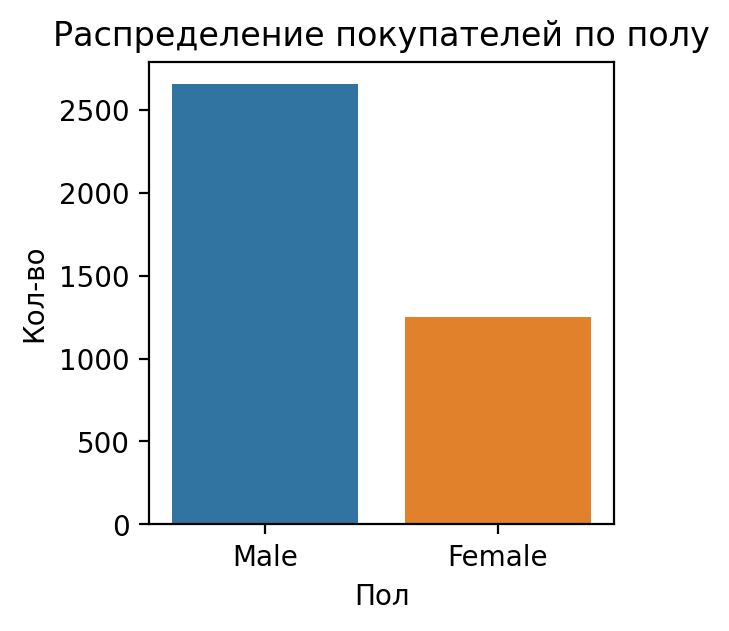

In [2608]:
plt.figure(figsize=(3, 3), dpi=200)
sns.countplot(data=df, x='Gender')

plt.xlabel('Пол')
plt.ylabel('Кол-во')

plt.title('Распределение покупателей по полу');

# Oпределите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары

In [2609]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [2610]:
# Находим пол, который покупает больше всего
most_purchases_gender = df.groupby("Gender")["Item Purchased"].count().idxmax()

# Находим возраст, который покупает больше всего
most_purchases_age = df.groupby("Age")["Item Purchased"].count().idxmax()

In [2611]:
# Находим пол, который покупает самые дорогие товары
most_expensive_gender = df.groupby("Gender")["Purchase Amount (USD)"].sum().idxmax()

# Находим возраст, который покупает самые дорогие товары
most_expensive_age = df.groupby("Age")["Purchase Amount (USD)"].sum().idxmax()

In [2612]:
# Находим возраст, который покупает чаще всего
most_frequent = df[df['Frequency of Purchases'] == 'Bi-Weekly']

most_frequent_age = most_frequent.groupby('Age')['Frequency of Purchases'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

most_frequent_age = most_frequent_age.iloc[0]['Age']

In [2613]:
# Находим возраст пол, который покупает чаще всего
most_frequent_gender = most_frequent.groupby('Gender')['Frequency of Purchases'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)


most_frequent_gender_result = most_frequent_gender.iloc[0]['Gender']

In [2614]:

print("Пол с наибольшими покупками:", most_purchases_gender)
print("Возраст с наибольшими покупками:", most_purchases_age)


print("Пол с самыми дорогими покупками:", most_expensive_gender)
print("Возраст с самыми дорогими покупками:", most_expensive_age)


print("Возраст, который чаще всего покупает:", most_frequent_age)
print("Пол, который чаще всего покупает:", most_frequent_gender_result)


Пол с наибольшими покупками: Male
Возраст с наибольшими покупками: 69
Пол с самыми дорогими покупками: Male
Возраст с самыми дорогими покупками: 49
Возраст, который чаще всего покупает: 29
Пол, который чаще всего покупает: Male


# Определите, есть ли зависимость между цветом одежды и сезоном.


In [2615]:
from scipy.stats import chi2_contingency

# Создаем таблицу сопряженности
color_season_table = pd.crosstab(df["Color"], df["Season"])

# Проводим тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(color_season_table)

if p < 0.05:
    print("Зависимость между цветом одежды и сезоном есть (p-value = {:.5f})".format(p))
else:
    print("Зависимости между цветом одежды и сезоном нет (p-value = {:.5f})".format(p))

Зависимости между цветом одежды и сезоном нет (p-value = 0.71855)


# Посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.

In [2616]:
# Сезонный MAU
seasonal_mau = df.groupby("Season")["Customer ID"].nunique()

# Динамика MAU
seasonal_mau_diff = seasonal_mau.pct_change() * 100

print("Сезонный MAU:\n", seasonal_mau)
print("\nДинамика MAU:\n", seasonal_mau_diff)

Сезонный MAU:
 Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64

Динамика MAU:
 Season
Fall           NaN
Spring    2.461538
Summer   -4.404404
Winter    1.675393
Name: Customer ID, dtype: float64


# Найдите самую популярную букву в названии одежды. 

In [2617]:
from collections import Counter

clothing_df = df[df['Category'] == 'Clothing']
clothing_df

# Получаем все буквы из столбца "Item Purchased"
all_letters = "".join(clothing_df["Item Purchased"]).replace(" ", "").lower()

# Считаем частоту букв
letter_counts = Counter(all_letters)

# Находим самую популярную букву
most_common_letter = letter_counts.most_common(1)[0][0]

print("Самая популярная буква в названии одежды:", most_common_letter)

Самая популярная буква в названии одежды: s


<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [2618]:
drinks = pd.read_csv('/Users/dmitrykomarov/Desktop/Python/wb/wb_eda/drinks.csv')
df = drinks.copy()

In [2619]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [2620]:
df.describe().applymap(lambda x: f"{x:2f}")[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']].T

/var/folders/dk/n71lg2t15112j9nnvkz6cznm0000gn/T/ipykernel_7055/2416194258.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe().applymap(lambda x: f"{x:2f}")[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']].T


,count,mean,std,min,25%,50%,75%,max
beer_servings,193.000000,106.160622,101.143103,0.000000,20.000000,76.000000,188.000000,376.000000
spirit_servings,193.000000,80.994819,88.284312,0.000000,4.000000,56.000000,128.000000,438.000000
wine_servings,193.000000,49.450777,79.697598,0.000000,1.000000,8.000000,59.000000,370.000000
total_litres_of_pure_alcohol,193.000000,4.717098,3.773298,0.000000,1.300000,4.200000,7.200000,14.400000


In [2621]:
result = df.describe(include=["object"])[['country']].T
print(result)

        count unique          top freq
country   193    193  Afghanistan    1


In [2622]:
df.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [2623]:
# Выявляем страны с максимальным потреблением для каждого типа напитков
max_beer_country = df.loc[df['beer_servings'].idxmax(), 'country']
max_spirit_country = df.loc[df['spirit_servings'].idxmax(), 'country']
max_wine_country = df.loc[df['wine_servings'].idxmax(), 'country']

# Вывод результатов
print("Страна с максимальным потреблением пива:", max_beer_country)
print("Страна с максимальным потреблением спиртных напитков:", max_spirit_country)
print("Страна с максимальным потреблением вина:", max_wine_country)

Страна с максимальным потреблением пива: Namibia
Страна с максимальным потреблением спиртных напитков: Grenada
Страна с максимальным потреблением вина: France


<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 


In [2624]:
data = pd.read_csv('/Users/dmitrykomarov/Desktop/Python/wb/wb_eda/tarantino.csv')
df = data.copy()
df

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
1889,Jackie Brown,word,motherfucker,141.93
1890,Jackie Brown,word,ass,142.43
1891,Jackie Brown,word,fucking,142.47
1892,Jackie Brown,word,goddamn,142.97


In [2625]:
result = df.describe(include=["object"])[['movie', 'type', 'word']].T
print(result)

      count unique           top  freq
movie  1894      7  Pulp Fiction   476
type   1894      2          word  1704
word   1704     60       fucking   407


In [2626]:
df.isnull().sum()

movie           0
type            0
word          190
minutes_in      0
dtype: int64

# Число проклятий, летальных исходов и их соотношение по фильмам 


In [2627]:
# Подсчет количества проклятий и летальных исходов
curse_counts = df[df['type'] == 'word'].groupby('movie').size()
death_counts = df[df['type'] == 'death'].groupby('movie').size()

# Соотношение проклятий к летальным исходам
curse_death_ratio = np.round((curse_counts / death_counts).fillna(0), 2)

# Объединение данных в таблицу
summary = pd.DataFrame({
    'Curses': curse_counts,
    'Deaths': death_counts,
    'Curses-to-Deaths Ratio': curse_death_ratio
}).fillna(0)

summary

,Curses,Deaths,Curses-to-Deaths Ratio
movie,,,
Django Unchained,262,47,5.57
Inglorious Basterds,58,48,1.21
Jackie Brown,368,4,92.00
Kill Bill: Vol. 1,57,63,0.90
Kill Bill: Vol. 2,69,11,6.27
Pulp Fiction,469,7,67.00
Reservoir Dogs,421,10,42.10


# Частота употребления конкретных проклятий 
### Находил однокоренные слова

In [2628]:
# Загрузка необходимых данных из nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# Инициализация лемматизатора
lemmatizer = WordNetLemmatizer()

# Функция для лемматизации
def lemmatize_word(word):
    if isinstance(word, str):  
        return lemmatizer.lemmatize(word)  
    return word

# Применение лемматизации
df['lemmatized_word'] = df['word'].apply(lemmatize_word)

df['lemmatized_word'].value_counts().reset_index(name='count')



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dmitrykomarov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/dmitrykomarov/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,lemmatized_word,count
0,fucking,407
1,shit,221
2,fuck,216
3,n-word,179
4,as,140
5,goddamn,113
6,motherfucker,85
7,bitch,73
8,hell,45
9,damn,37


# Распределение времени между проклятиями по каждому фильму

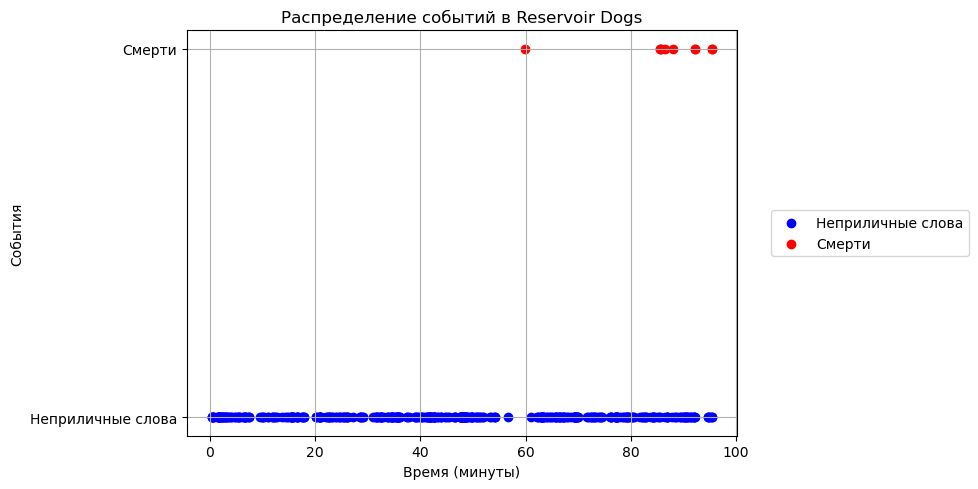

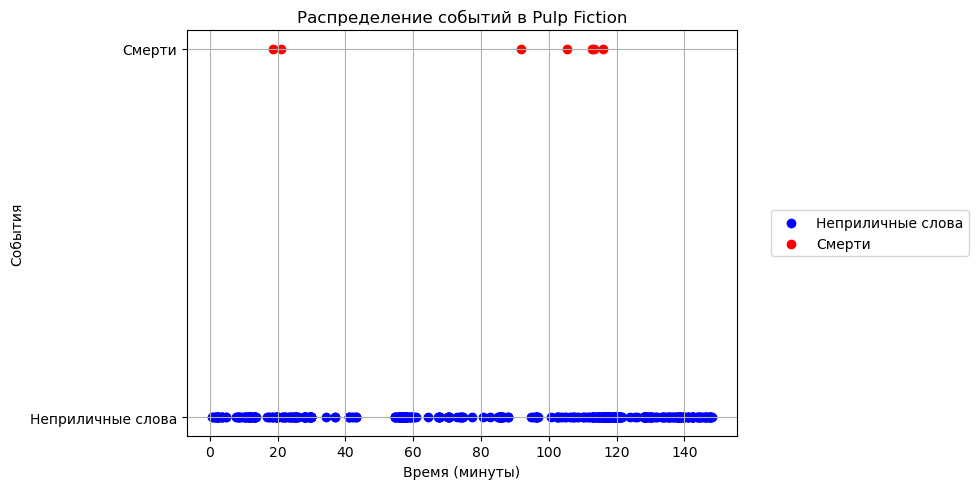

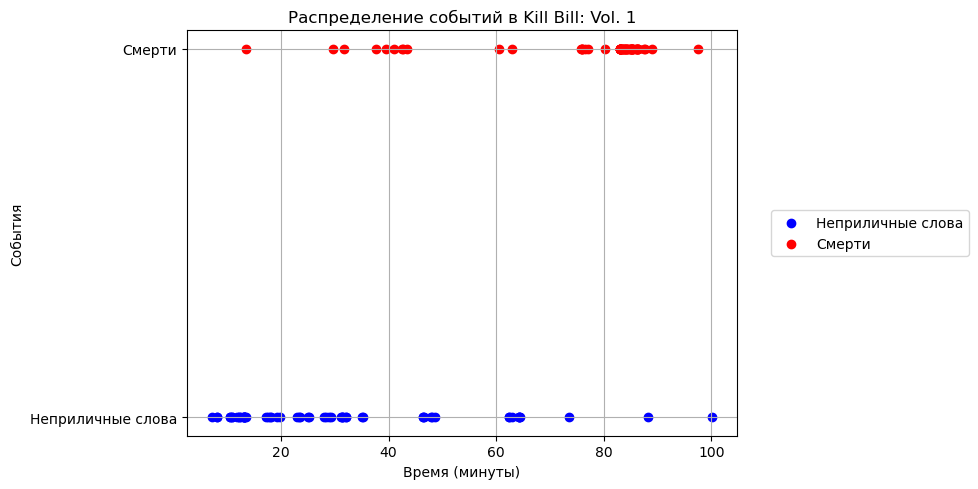

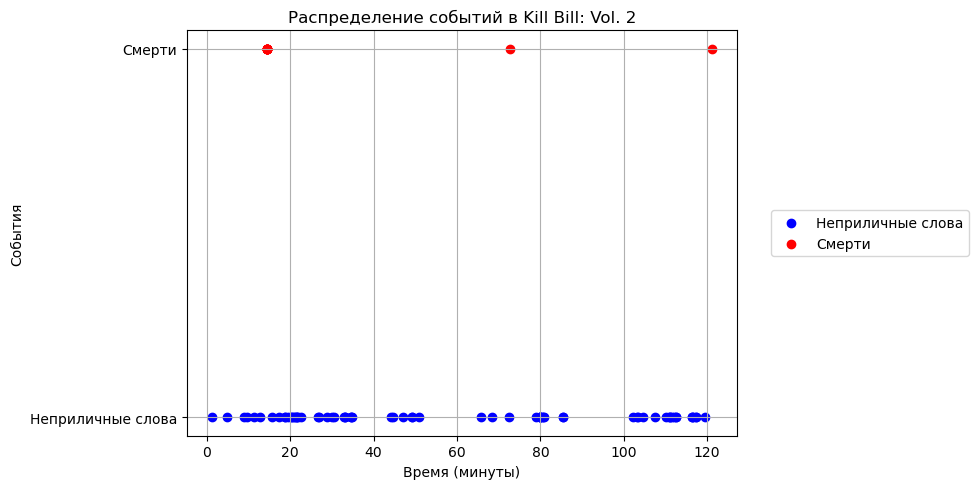

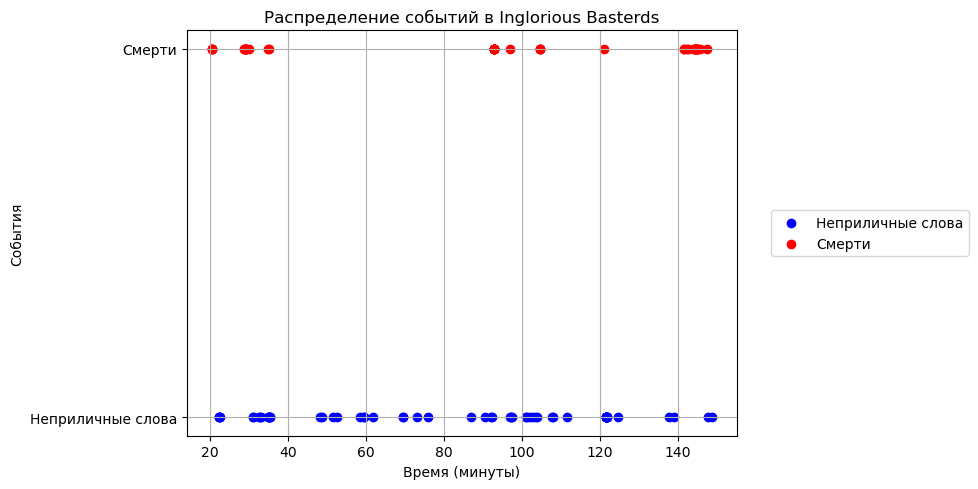

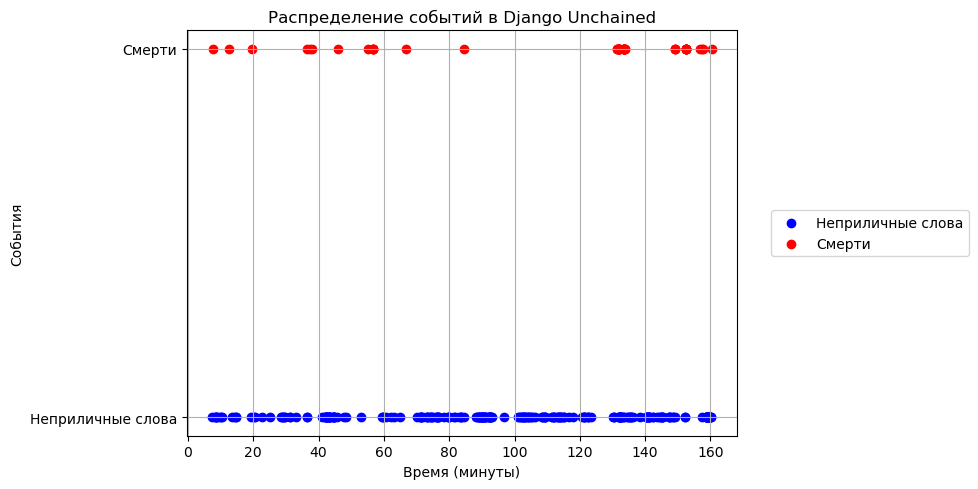

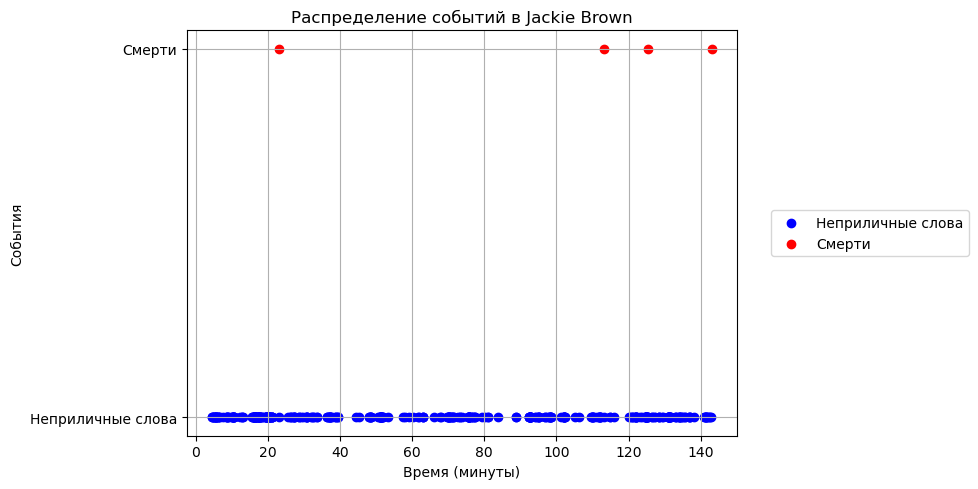

In [2629]:
# Для каждого фильма создадим график
movies = df['movie'].unique()
for movie in movies:
    movie_data = df[df['movie'] == movie]
    
    plt.figure(figsize=(10, 5)) 
    plt.title(f"Распределение событий в {movie}")
    plt.xlabel("Время (минуты)")
    plt.ylabel("События")
    
    # События для плохих слов 
    word_events = movie_data[movie_data['type'] == 'word']
    plt.scatter(word_events['minutes_in'], [1] * len(word_events), color='blue', label='Неприличные слова')

    # События для смертей 
    death_events = movie_data[movie_data['type'] == 'death']
    plt.scatter(death_events['minutes_in'], [2] * len(death_events), color='red', label='Смерти')

    
    plt.yticks([1, 2], ['Неприличные слова', 'Смерти'])
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))  
    plt.grid(True)
    plt.tight_layout() 
    plt.show()